In [12]:
import numpy as np
from matplotlib import pyplot as plt
import io
import glob
from PIL import Image

In [13]:
test_file = 'sendat_data/SEN3_00066667BB2A_25590819_000000.sendat'
sendat_files = glob.glob('sendat_data/*.sendat')
sendat_file = np.fromfile(test_file, np.uint8)
# sendat_file = np.fromfile(sendat_files[26], np.uint8)

In [65]:
SENDAT_PATH = 'sendat_data/'
glob.glob('sendat_data/SEN3_00066667BB2C_25590804_100000.sendat')

['sendat_data/SEN3_00066667BB2C_25590804_100000.sendat']

In [14]:
def estimate_pos(start, end):
    gap = (np.mean(norm_w0[start:end]) - np.mean(norm_w1[start:end]))/np.mean(norm_w1[start:end])
    if (gap < -0.15):
        pos = 'lelf (4)'
    elif(gap > 0.15):
        pos = 'right (5)'
    else:
        pos = 'center (3)'
    print(pos)
    print(gap)
    return 'p:' + pos + ' | dw:' +str(gap)[:7]

In [57]:
frame = np.zeros([960, 640, 3], dtype = np.uint8)
p0 = []
p1 = []
w0 = []
w1 = []
for i in range(len(sendat_file) // 45):
    index = i * 45
    p_temp = sendat_file[index + 10 : index + 18]
    p_sub = [p - 127 for p in p_temp]
    p0.extend(p_sub)
    
    w_temp = sendat_file[index + 18 : index + 26]
    w0.extend(w_temp)
    
    p_temp = sendat_file[index + 26 : index + 34]
    p_sub = [p - 127 for p in p_temp]
    p1.extend(p_sub)

    w_temp = sendat_file[index + 34 : index + 42]
    w1.extend(w_temp)
    
norm_p0 = p0 / np.linalg.norm(p0)
norm_w0 = w0 / np.linalg.norm(w0)
norm_p1 = p1 / np.linalg.norm(p1)
norm_w1 = w1 / np.linalg.norm(w1)

TypeError: 'module' object is not callable

102100
lelf (4)
-0.5009230720884185


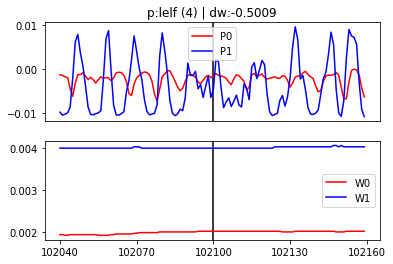

In [58]:
mid = 102100
if mid < 60 : mid = 60
elif mid > len(p0)-60 : mid = len(p0) - 60 

print(mid)   
start = mid - 60
end = mid + 60
x = np.arange(start,end,1)
plt.subplot(211)
plt.xticks([])
plt.title(estimate_pos(start, end))
plt.axvline(mid, color='black')
plt.plot(x,norm_p0[start:end],color = 'red', label='P0')
plt.plot(x,norm_p1[start:end],color = 'blue',label='P1')
plt.legend()
plt.subplot(212)
plt.xticks(np.arange(start,end+1,30))
plt.axvline(mid, color='black')
plt.plot(x,norm_w0[start:end], color = 'red', label = 'W0')
plt.plot(x,norm_w1[start:end], color = 'blue', label = 'W1')
plt.legend()

buf = io.BytesIO()
plt.savefig(buf, format='jpg',dpi=300)
buf.seek(0)
im = Image.open(buf)
im = im.resize((640,480))
plot = np.array(im)
frame[:480,:640,:] = plot
frame[480:,:640,:] = plot
buf.close()

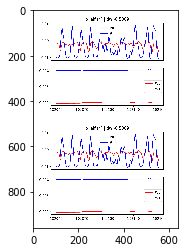

In [59]:
plt.imshow(frame)

In [52]:
Image.fromarray(frame)

TypeError: Cannot handle this data type

In [46]:
frame

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  